In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## (a)

### pseudocode
> \# 初始化  
> station1 = 0
> station2 = 0
> start_customer = 0
> finish_ customer = 0  
>
> \# 生成第一个事件  
> next_arrival = exp(1/1.8)
> next_station_1_1_finish = 2e10
> next_station_1_2_finish = 2e10
> next_station_2_finish = 2e10  
>
> \# 循环直到服务完第4000个客户（1000热身+3000记录）  
> **WHILE** finish_custumer <= 4000:
>> \# 进入下一个事件  
>> clock = min(next_arrival,next_station_1_1_finish,next_station_1_2_finish,next_station_2_finish)  
>> \# 更新下一个事件对状态对影响  
>> **if** clock == next_arrival:
>>> station1 += 1
    start_customer += 1  
    \# 记录第i个客户进入系统的时间  
    customer_in[start_customer] = clock
>>
>> **if** clock == next_station_1_1_finish:
>>> station1 -= 1
    station2 += 1
>>
>> **if** clock == next_station_1_2_finish:
>>> station1 -= 1
    station2 += 1
>>
>> **if** clock == next_station_2_finish:
>>> station2 -= 1
    finish_customer += 1  
    \# 记录第i个客户离开系统的时间  
    customer_out[finish_customer] = clock
>>
>> \# 产生下一个事件（利用了指数分布的无记忆性）  
>> next_arrival = clock + exp(1/1.8)
>>
>> **if** station1 >= 2:
>>> next_station1_1 = clock + exp(1)
    next_station1_2 = clock + exp(1)
>>
>> **elif** station1 > 0:
>>> next_station1_1 = clock + exp(1)
    next_station1_2 = clock + 1e10
>>
>> **else**:
>>> next_station1_1 = clock + 1e10
    next_station1_2 = clock + 1e10
>>
>> **if** station2 > 0:
>>> next_station2 = clock + exp(1/2)
>>
>>**else**:
>>> next_station2 = clock + 1e10
>
> \# 计算第i个客户在系统中停留的时间  
> sojourn_time = customer_out - customer_in

In [22]:
# 初始化
customer_in = pd.Series([0])
customer_out = pd.Series([0])
station1 = 0
station2 = 0
start_customer = 0
finish_customer = 0
clock = 0

# 生成第一个事件
next_arrival = np.random.exponential(1/1.8)
next_station1_1 = 1e10
next_station1_2 = 1e10
next_station2 = 1e10

In [23]:
# 循环直到第4000个客户离开
while finish_customer < 4000:
    # 新的时间为下一个事件
    clock = min(next_station1_1,next_station1_2,next_station2,next_arrival)

    # 判断哪个事件发生了，并做出相应反应
    if next_arrival == clock:
        station1 += 1
        start_customer += 1
        # 记录第i个顾客第进入时间
        customer_in[start_customer] = clock
    elif next_station1_1 == clock:
        station1 -= 1
        station2 += 1
    elif next_station1_2 == clock:
        station1 -= 1
        station2 += 1
    elif next_station2 == clock:
        station2 -= 1
        finish_customer += 1
        # 记录第i个顾客的离开时间
        customer_out[finish_customer] = clock


    #更新事件（无记忆性）
    next_arrival = clock + np.random.exponential(1/1.8)

    if station1 >= 2:
        next_station1_1 = clock + np.random.exponential(1)
        next_station1_2 = clock + np.random.exponential(1)
    elif station1 > 0:
        next_station1_1 = clock + np.random.exponential(1)
        next_station1_2 = clock + 1e10
    else:
        next_station1_1 = clock + 1e10
        next_station1_2 = clock + 1e10

    if station2 > 0:
        next_station2 = clock + np.random.exponential(1/2)
    else:
        next_station2 = clock + 1e10


## (b)

(array([442., 676., 597., 334., 271., 254., 240., 148.,  25.,  13.]),
 array([ 0.32345877,  3.11415702,  5.90485528,  8.69555354, 11.4862518 ,
        14.27695005, 17.06764831, 19.85834657, 22.64904482, 25.43974308,
        28.23044134]),
 <BarContainer object of 10 artists>)

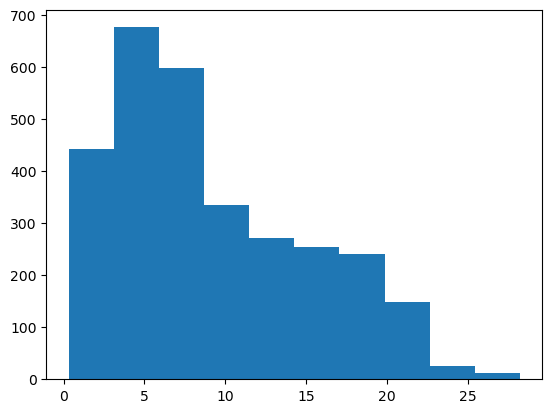

In [24]:
sojourn_time = customer_out - customer_in
warmed_sojourn_time_2 = sojourn_time[1000:4000]
plt.hist(warmed_sojourn_time_2)

In [25]:
warmed_sojourn_time_2.describe()

count    3000.000000
mean        9.176166
std         5.950586
min         0.323459
25%         4.381388
50%         7.474338
75%        13.654463
max        28.230441
dtype: float64

## (c)

In [11]:
def lambda_exp1_norm0515(Lambda=1.8):
    # 初始化
    customer_in = pd.Series([0])
    customer_out = pd.Series([0])
    station1 = 0
    station2 = 0
    start_customer = 0
    finish_customer = 0
    A_list = pd.Series([0])


    # 生成第一个事件
    next_arrival = np.random.exponential(1/Lambda)
    next_station1_1 = 1e10
    next_station1_2 = 1e10
    next_station2 = 1e10

    # 循环直到第4000个客户离开
    while finish_customer < 4000:
        # 新的时间为下一个事件
        clock = min(next_station1_1,next_station1_2,next_station2,next_arrival)


        # 判断station2的情况
        new_station2_normal = False

        # 判断哪个事件发生了，并做出相应反应
        if next_arrival == clock:
            station1 += 1
            # 记录第i个顾客第进入时间
            start_customer += 1
            customer_in[start_customer] = clock

        elif next_station1_1 == clock:
            station1 -= 1
            station2 += 1
            # 判断station2的情况
            if station2 == 1:
                new_station2_normal = True

        elif next_station1_2 == clock:
            station1 -= 1
            station2 += 1
            # 判断station2的情况
            if station2 == 1:
                new_station2_normal = True

        elif next_station2 == clock:
            station2 -= 1
            if station2 > 0:
                new_station2_normal = True
            # 记录第i个顾客的离开时间
            finish_customer += 1
            customer_out[finish_customer] = clock

        #更新事件（无记忆性）
        next_arrival = clock + np.random.exponential(1/Lambda)

        if station1 >= 2:
            next_station1_1 = clock + np.random.exponential(1)
            next_station1_2 = clock + np.random.exponential(1)
        elif station1 == 1:
            next_station1_1 = clock + np.random.exponential(1)
            next_station1_2 = clock + 1e10
        else:
            next_station1_1 = clock + 1e10
            next_station1_2 = clock + 1e10

        # 更新station2的情况
        if new_station2_normal:
            next_station2_add = np.random.normal(loc=0.5,scale=0.15)
            while next_station2_add <= 0:
                next_station2_add = np.random.normal(loc=0.5,scale=0.15)
            next_station2 = clock + next_station2_add

        if station2 == 0 :
            next_station2 = clock + 2e10

    # 计算输出
    sojourn_time = customer_out - customer_in
    warmed_sojourn_time = sojourn_time[1000:4000]

    return  warmed_sojourn_time

(array([532., 756., 506., 294., 272., 181., 255., 114.,  45.,  45.]),
 array([ 0.65866902,  4.06696022,  7.47525142, 10.88354261, 14.29183381,
        17.700125  , 21.1084162 , 24.5167074 , 27.92499859, 31.33328979,
        34.74158099]),
 <BarContainer object of 10 artists>)

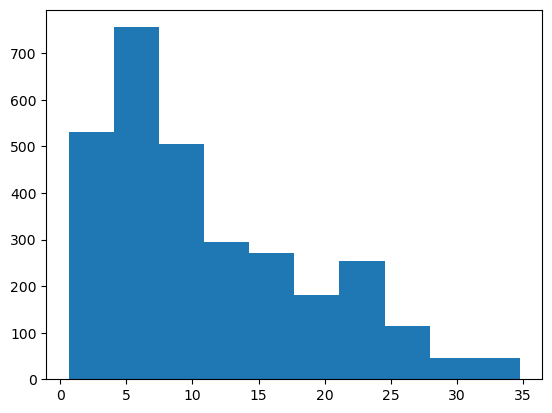

In [12]:
warmed_sojourn_time_3 = lambda_exp1_norm0515(1.8)
plt.hist(warmed_sojourn_time_3)

In [13]:
warmed_sojourn_time_3.describe()


count    3000.000000
mean       11.178642
std         7.736979
min         0.658669
25%         4.868822
50%         8.828770
75%        16.572739
max        34.741581
dtype: float64

## (d)

In [17]:
result_4 = pd.Series()
for Lambda in np.arange(0.01,2,0.03):
    warmed_sojourn_time_4 = lambda_exp1_norm0515(Lambda)
    result_4[Lambda] = warmed_sojourn_time_4.mean()


/var/folders/qj/s_39ngds10394t00jt5t0c4w0000gn/T/ipykernel_30406/3006335974.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result_4 = pd.Series()


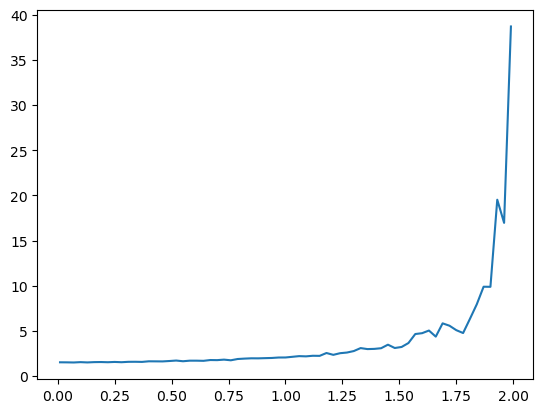

In [18]:
plt.plot(result_4)
